## Simpons Paradox and the Berkely Gender Bias Problem

In this weeks lectures we looked at Simpons paradox and the Berkely gender bias problem. In the gender bias problem it can be shown that looking at the aggregate 1973 admissions data for Berkely, there seems to be a bias towards admitting men - more men are admitted that the expted number based on the admission rate for the university. However, if the data is considered at the department level - it can be proven that on a department by department basis there is no bias towards men. The differences are due to the fact that more women apply to course that have lower admission rates overall. We can work thruogh the example from this [paper](https://pdfs.semanticscholar.org/b704/3d57d399bd28b2d3e84fb9d342a307472458.pdf) .

### Aggregate Data from the Paper

In [13]:
# Calculate the admission rate
admission_rate = (3738 + 1494)/(3738 + 1494 + 4704 + 2827)
admission_rate

0.4099349682676487

In [14]:
# Calculate expected men
total_men = 3738 + 4704
expected_men = total_men * admission_rate
expected_men

3460.6710021154904

In [15]:
# Calculate expected women
total_women = 1494 + 2827
expected_women = total_women * admission_rate
expected_women

1771.32899788451

In [16]:
print("The admissions variance for men is : " + str(round(3738 - expected_men,2)))

The admissions variance for men is : 277.33


In [17]:
print("The admissions variance for women is : " + str(round(1494 - expected_women,2)))

The admissions variance for women is : -277.33


So taking this information at face value and it looks like there is bias towards men. The study found that by considering each of the 106 departments, none of these showed a bias to men. There is no data for the 106 departments in the paper but they have fictional data on 2 fictional departments (machismatics, social warfare) to highlight how this has happened.

### Considering the fictional data 

Here, we will check per department whether or not there is bias.

In [18]:
# Calculate the admission rate for machismatics
admission_rate = (200 + 100)/(200 + 100 + 200 + 100)
admission_rate

0.5

In [19]:
# Calculate expected men
total_men = 200 + 200
expected_men = total_men * admission_rate
expected_men

200.0

In [20]:
# Calculate expected women
total_women = 100 + 100
expected_women = total_women * admission_rate
expected_women

100.0

In [21]:
print("The admissions variance for men is : " + str(round(200 - expected_men,2)))
print("The admissions variance for women is : " + str(round(100 - expected_women,2)))

The admissions variance for men is : 0.0
The admissions variance for women is : 0.0


In [23]:
# Calculate the admission rate for social warfare
admission_rate = (50 + 150)/(50 + 150 + 100 + 300)
admission_rate

0.3333333333333333

In [25]:
# Calculate expected men
total_men = 50 + 100
expected_men = total_men * admission_rate
expected_men

50.0

In [24]:
# Calculate expected women
total_women = 150 + 300
expected_women = total_women * admission_rate
expected_women

150.0

In [26]:
print("The admissions variance for men is : " + str(round(50 - expected_men,2)))
print("The admissions variance for women is : " + str(round(150 - expected_women,2)))

The admissions variance for men is : 0.0
The admissions variance for women is : 0.0


This shows that neither fictional department has any bias to either gender. In the next step we will look at the aggregate of the 2 fictional departments.

In [27]:
# Calculate the admission rate the 2 fictional departments
admission_rate = (250 + 250)/(250 + 250 + 400 + 300)
admission_rate

0.4166666666666667

In [28]:
# Calculate expected men
total_men = 250 + 300
expected_men = total_men * admission_rate
expected_men

229.16666666666669

In [29]:
# Calculate expected women
total_women = 250 + 400
expected_women = total_women * admission_rate
expected_women

270.83333333333337

In [30]:
print("The admissions variance for men is : " + str(round(250 - expected_men,2)))
print("The admissions variance for women is : " + str(round(250 - expected_women,2)))

The admissions variance for men is : 20.83
The admissions variance for women is : -20.83


So even though there was no gender bias in either department - when agregated it looks like there is. The aggreagate score does no consider what genders are applying to what departments and the admission rates are for each departments. In this example proportionally more women are applying to the course with the lower admission rate. (Maybe further study is required to determine why women are choosing particular courses but thats not for here!)

### Regression Example

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


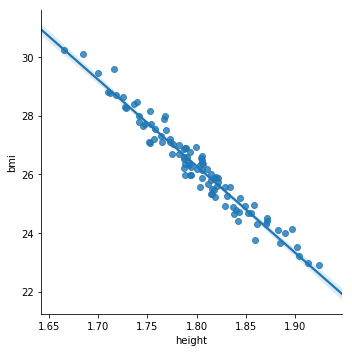

In [14]:
# Simulate height and weight data for men, then plot
men = pd.DataFrame({'height': np.random.normal(1.8, 0.05, 100) , 'weight':np.random.normal(85, 1, 100)})
men["bmi"] = men['weight']/men['height']**2
sns.lmplot(x='height', y='bmi', data=men)

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


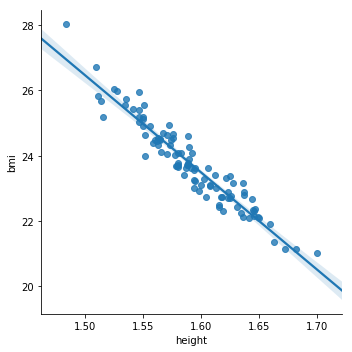

In [15]:
# Simulate height and weight data for women, then plot
women = pd.DataFrame({'height': np.random.normal(1.6, 0.05, 100) , 'weight':np.random.normal(60, 1, 100)})
women["bmi"] = women['weight']/women['height']**2
sns.lmplot(x='height', y='bmi', data=women)

Note that in both cases for our simultated data - BMI reduces with height. The next step is to aggregate the data sets.

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


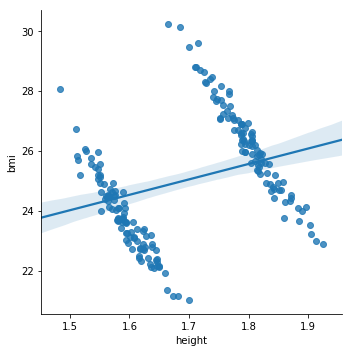

In [19]:
# add a gender column to both dataframe to allow us to seperate in future
men["gender"] = 'male'
women["gender"] = 'female'
# merge the 2 dataframes
people = pd.concat([men,women])
sns.lmplot(x='height', y='bmi', data=people)

When aggregated, the regression line (poor as it is!) shows bmi increasing with height - this was not the case when analysed per gender. A stark warning!

## End